# Exploitation vs Exploration

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from bayes_opt import BayesianOptimization, Observer, Events

# use sklearn's default parameters for theta and random_start
gp_params = {"alpha": 1e-5, "n_restarts_optimizer": 2}

# Target function

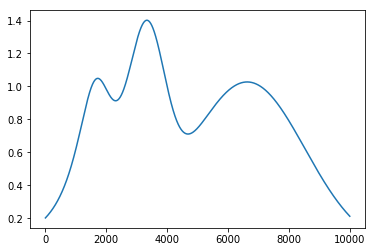

In [2]:
np.random.seed(42)
xs = np.linspace(-2, 10, 10000)
f = np.exp(-(xs - 2)**2) + np.exp(-(xs - 6)**2/10) + 1/ (xs**2 + 1)

plt.plot(f)
plt.show()

## Utility function for plotting

In [3]:
def plot_bo(f, bo):
    xs = [x["x"] for x in bo.res["all"]["params"]]
    ys = bo.res["all"]["values"]

    mean, sigma = bo.gp.predict(np.arange(len(f)).reshape(-1, 1), return_std=True)
    
    plt.figure(figsize=(16, 9))
    plt.plot(f)
    plt.plot(np.arange(len(f)), mean)
    plt.fill_between(np.arange(len(f)), mean+sigma, mean-sigma, alpha=0.1)
    plt.scatter(bo.X.flatten(), bo.Y, c="red", s=50, zorder=10)
    plt.xlim(0, len(f))
    plt.ylim(f.min()-0.1*(f.max()-f.min()), f.max()+0.1*(f.max()-f.min()))
    plt.show()

# Acquisition Function "Upper Confidence Bound"

## Prefer exploitation (kappa=1.0)

Note that most points are around the peak(s).

Initialization completed
Optimization step finished, current max:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization step finished, current max:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization step finished, current max:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization finished, maximum value at:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization step finished, current max:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization step finished, current max:  {'max_val': 1.3105341516328732, 'max_params': {'x': 3052.255085097617}}
Optimization step finished, current max:  {'max_val': 1.398696238925308, 'max_params': {'x': 3283.1161985556523}}
Optimization step finished, current max:  {'max_val': 1.398696238925308, 'max_params': {'x': 3283.1161985556523}}
Optimization step finished, current max:  {'max_val': 1.4018624

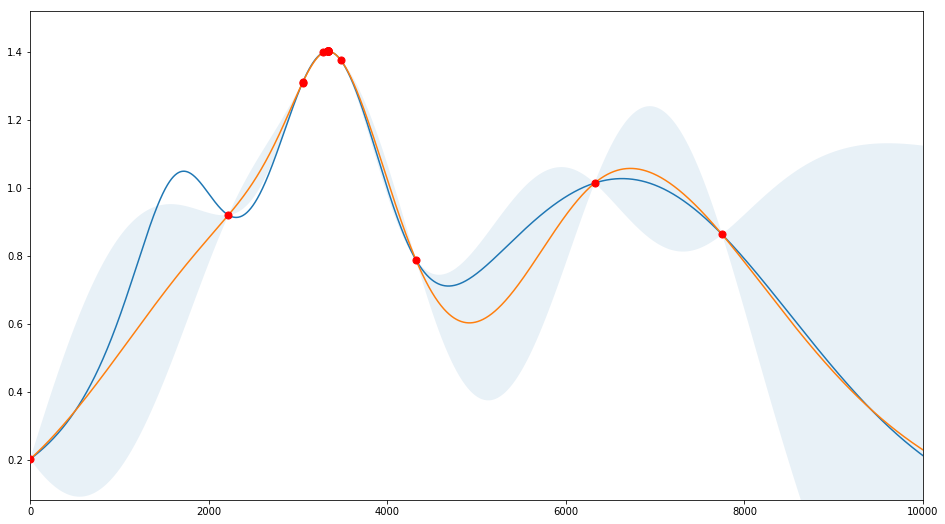

In [5]:

observer = Observer()

bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

bo.register(Events.INIT_DONE, observer)
bo.register(Events.FIT_DONE, observer)
bo.register(Events.FIT_STEP_DONE, observer)

bo.maximize(init_points=2, n_iter=3, acq="ucb", kappa=1, **gp_params)
bo.maximize(init_points=2, n_iter=25, acq="ucb", kappa=1, **gp_params)

plot_bo(f, bo)

## Prefer exploration (kappa=10)

Note that the points are more spread out across the whole range.

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.71093 | 4681.1869 | 
    2 | 00m00s |    0.83643 | 7845.7506 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m00s |    0.83699 | 7843.4207 | 
    4 | 00m01s |    0.20166 |    0.0000 | 
    5 | 00m01s |    0.21199 | 9998.9678 | 
    6 | 00m00s |    0.91307 | 2294.4005 | 
    7 | 00m01s |    1.01406 | 6321.3760 | 
    8 | 00m01s |    0.80620 | 1237.1243 | 
    9 | 00m01s |    1.38677 | 3444.4770 | 
   10 | 00m01s |    0.49220 | 8926.2979 | 
   11 | 00m01s |    1.00410 | 7035.5447 | 
   12 | 00m01s |    1.03090 | 3962.5094 | 
   13 | 00m01s |    0.88112 | 5552.2406 | 
   14 | 00m00s |    1.22992 | 2932.5473 | 
   15 | 00m01s |    0.40545 |  646.5155 | 
   16 | 00m01s |    1.38889 | 3231.9316 | 
   17 | 00m01s |    1.04754 | 1755.6699 | 
   18 | 00m01s |    0.67574 | 8363.9162 | 
   19 | 00m01s |   

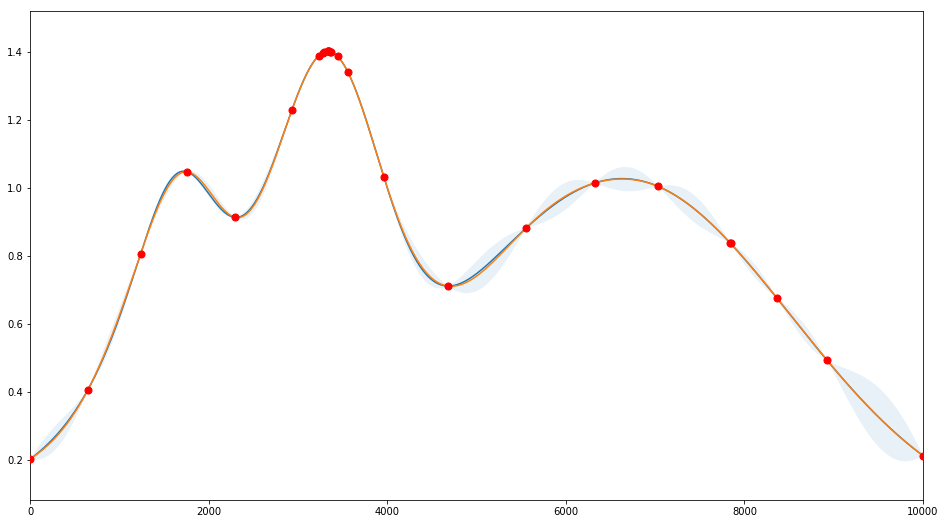

In [9]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=1)

bo.maximize(init_points=2, n_iter=25, acq="ucb", kappa=10, **gp_params)

plot_bo(f, bo)

# Acquisition Function "Expected Improvement"

## Prefer exploitation (xi=0.0)

Note that most points are around the peak(s).

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    1.17636 | 2860.1868 | 
    2 | 00m00s |    0.99261 | 7127.5887 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m00s |    0.20166 |    0.0192 | 
    4 | 00m00s |    1.17561 | 2859.5147 | 
    5 | 00m01s |    0.72272 | 4534.7077 | 
    6 | 00m01s |    0.33405 | 9468.7852 | 
    7 | 00m00s |    0.93041 | 2166.0036 | 
    8 | 00m00s |    1.38192 | 3206.9657 | 
    9 | 00m00s |    1.36458 | 3508.3336 | 
   10 | 00m00s |    0.77473 | 8053.7197 | 
   11 | 00m00s |    1.40187 | 3329.8376 | 
   12 | 00m00s |    0.98791 | 6092.0199 | 
   13 | 00m00s |    1.40190 | 3334.6260 | 
   14 | 00m00s |    0.75933 | 1179.8231 | 
   15 | 00m00s |    1.40190 | 3333.9261 | 
   16 | 00m00s |    1.40190 | 3333.6509 | 
   17 | 00m00s |    1.40190 | 3333.4415 | 
   18 | 00m00s |    1.40190 | 3333.3111 | 
   19 | 00m00s |   

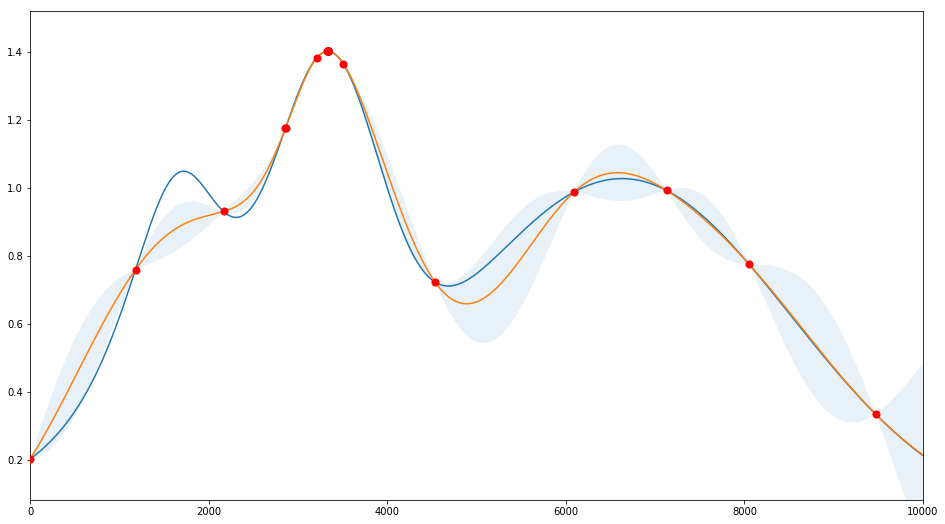

In [10]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=1)

bo.maximize(init_points=2, n_iter=25, acq="ei", xi=1e-4, **gp_params)

plot_bo(f, bo)

## Prefer exploration (xi=0.1)

Note that the points are more spread out across the whole range.

In [ ]:
bo = BayesianOptimization(f=lambda x: f[int(x)], pbounds={"x": (0, len(f)-1)}, verbose=1)

bo.maximize(init_points=2, n_iter=25, acq="ei", xi=0.1, **gp_params)

plot_bo(f, bo)

# Acquisition Function "Probability of Improvement"

## Prefer exploitation (xi=0.0)

Note that most points are around the peak(s).

In [ ]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=1)

bo.maximize(init_points=2, n_iter=25, acq="poi", xi=1e-4, **gp_params)

plot_bo(f, bo)

## Prefer exploration (xi=0.1)

Note that the points are more spread out across the whole range.

In [ ]:
bo = BayesianOptimization(f=lambda x: f[int(x)], pbounds={"x": (0, len(f)-1)}, verbose=1)

bo.maximize(init_points=2, n_iter=25, acq="poi", xi=0.1, **gp_params)

plot_bo(f, bo)